In [1]:
from oldModel import OrientationWei, sensory_noise_dist, sensory_noise_dist_sample
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 3
import seaborn as sns
# sns.set_context('talk')
import scipy.stats as ss
import math

from scipy.integrate import simpson, trapezoid
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d
from ipywidgets import interact
import ipywidgets as widgets
# from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

In [2]:
import riskModelPercept as model
import WeiPerception as wei

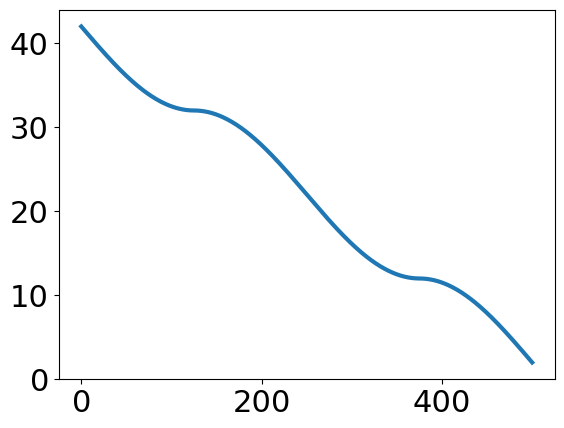

In [3]:
plt.plot(model.value_function_ori(model.stim_grid, "prior"))

In [8]:
def inverse_monotonic(y_0, x = model.stim_grid, y = model.value_function_ori(model.stim_grid, type)):
    indices = np.argsort(y)
    y_sorted = y[indices]
    
    def find_closest_index(y_0):
        i = np.searchsorted(y_sorted, y_0, side='left')
        if i == 0:
            return 0
        elif i == len(y_sorted):
            return len(y_sorted) - 1
        else:
            if y_0 - y_sorted[i-1] < y_sorted[i] - y_0:
                return i - 1
            else:
                return i

    i = find_closest_index(y_0)
    x_inverse = x[indices[i]]
    
    return x_inverse


100.07999999999998

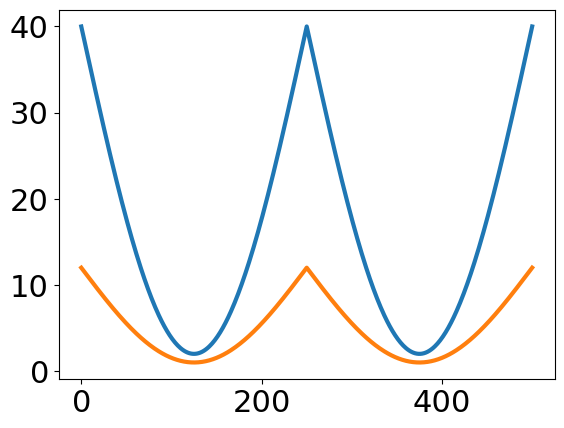

In [4]:

plt.plot((40 - np.abs(38*np.sin(model.stim_grid))))
plt.plot(model.value_function_ori(model.stim_grid, "prior"))
# plt.plot((2-(np.arctan(3*np.abs(np.sin(model.stim_grid)))/np.arctan(3))) / 7.61399)

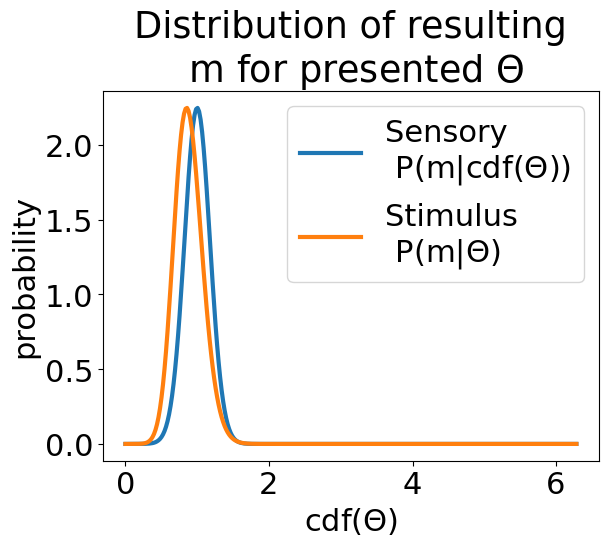

In [5]:
plt.plot(model.rep_grid,ss.vonmises(loc=1.0, kappa=32).pdf(model.rep_grid), label = "Sensory\n P(m|cdf($\Theta$))")
plt.plot(model.rep_grid,ss.vonmises(loc=1.0, kappa=32).pdf(model.cdf(model.rep_grid, model.rep_grid)), label = "Stimulus\n P(m|$\Theta$)")


plt.xlabel('cdf($\Theta$)')
plt.ylabel('probability')
plt.title('Distribution of resulting\n m for presented $\Theta$')
plt.legend()

plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

Text(0.5, 1.0, 'Wei : Bias -\n Varying stimulus noise')

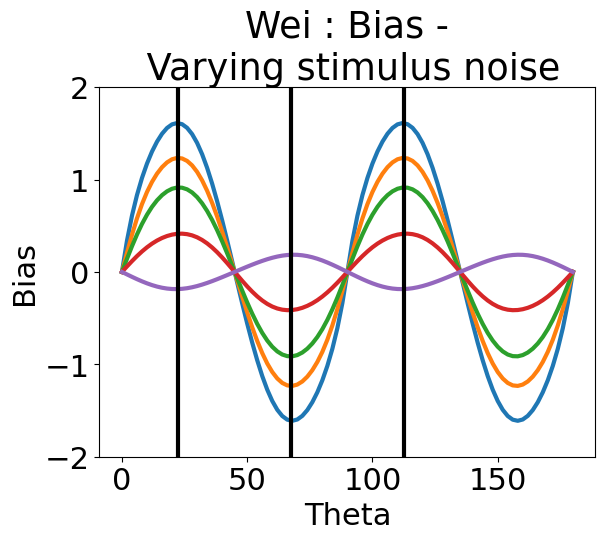

In [5]:
y=wei.x
y = np.append(y,2*np.pi)

ppp1 = wei.bias(kappa = 8, kappa_s = 10000)
ppp1[0]=ppp1[0]-2*np.pi
ppp1 = np.append(ppp1,ppp1[0])

ppp2 = wei.bias(kappa = 8, kappa_s = 32)
# ppp2[0]=ppp2[0]-2*np.pi
ppp2 = np.append(ppp2,ppp2[0])
ppp3 = wei.bias(kappa = 8, kappa_s = 16)
# ppp3[0]=ppp3[0]-2*np.pi
ppp3 = np.append(ppp3,ppp3[0])
ppp4 = wei.bias(kappa = 8, kappa_s = 8)
# ppp4[0]=ppp4[0]-2*np.pi
ppp4 = np.append(ppp4,ppp4[0])
ppp5 = wei.bias(kappa = 8, kappa_s = 4)
# ppp5[0]=ppp5[0]-2*np.pi
ppp5 = np.append(ppp5,ppp5[0])

# ppp1
plt.plot(90*y/np.pi,90*ppp1/np.pi)
plt.ylim(-2,2)
plt.plot(90*y/np.pi,90*ppp2/np.pi)
plt.plot(90*y/np.pi,90*ppp3/np.pi)
plt.plot(90*y/np.pi,90*ppp4/np.pi)
plt.plot(90*y/np.pi,90*ppp5/np.pi)


plt.axvline(22.5, c='k')
plt.axvline(67.5, c='k')
plt.axvline(112.5, c='k')

plt.xlabel('Theta')
plt.ylabel('Bias')
plt.title('Wei : Bias -\n Varying stimulus noise')

Text(0, 0.5, 'bias')

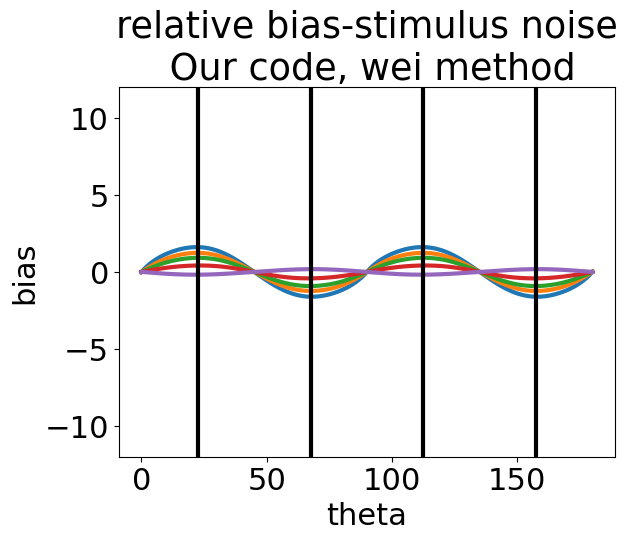

In [6]:

y = model.stim_grid

theta0 = np.linspace(0.0, 2.*np.pi, 500) #0.8
kappa1 = 10000
kappa2 = 32
kappa3 = 16
kappa4 = 8
kappa5 = 4


normalize = False

kappa_r = 8

pp1 = model.wei_bias(theta0, kappa1, kappa_r, normalize)
pp1[0]=pp1[0]#-2*np.pi


pp2 = model.wei_bias(theta0, kappa2, kappa_r, normalize)
pp2[0]=pp2[0]-2*np.pi


pp3 = model.wei_bias(theta0, kappa3, kappa_r, normalize)
pp3[0]=pp3[0]-2*np.pi

pp4 = model.wei_bias(theta0, kappa4, kappa_r, normalize)
pp4[0]=pp4[0]#-2*np.pi

pp5 = model.wei_bias(theta0, kappa5, kappa_r, normalize)
pp5[0]=pp5[0]#-2*np.pi

# ppp1
plt.plot(90*y/np.pi,90*pp1/np.pi)
plt.ylim(-12,12)
plt.plot(90*y/np.pi,90*pp2/np.pi)
plt.plot(90*y/np.pi,90*pp3/np.pi)
plt.plot(90*y/np.pi,90*pp4/np.pi)
plt.plot(90*y/np.pi,90*pp5/np.pi)


plt.title('relative bias-stimulus noise\n Our code, wei method')

plt.axvline(22.5, c='k')
plt.axvline(67.5, c='k')
plt.axvline(112.5, c='k')
plt.axvline(157.5, c='k')

plt.xlabel('theta')
plt.ylabel('bias')

In [ ]:
## Gifs

In [ ]:
theta0List = np.linspace((0./90.)*np.pi, (45./90.)*np.pi, 23)
sigma_stim = 0.05*np.pi

i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plt.plot(model.stim_grid*180./np.pi, np.squeeze(model.stimulus_noise(theta0, kappa_s=sigma_stim, grid=model.stim_grid[np.newaxis, :])))
    plt.axvline(theta0*180./np.pi, c='k', label = '$\Theta_0$ = %02d°'%((theta0*180.)/np.pi))
        
    plt.axvline(theta0*180./np.pi, c='k', label = '$\Theta_0$ = %02d°'%((theta0*180.)/np.pi))
    
    plt.legend()
    
    plt.title("Noisy stimulus (completely controllable in the experiment)")
    plt.xlabel("$\Theta$ (in degrees)")
    plt.ylabel("P($\Theta$)")
#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()

In [ ]:
# Back to simulations now of value

In [ ]:
high_stim_noise = 32
low_stim_noise = 10000
high_rep_noise = 8
low_rep_noise = 16


theta0 = 10.*np.pi/90.0
type = "linearPrior"
interpolation_kind = "linear"
bins = 25
kappa_s = low_stim_noise
kappa_r =  low_rep_noise

safe_value, safe_prob = model.safe_value_dist(theta0, kappa_s, kappa_r, type, interpolation_kind, bins)

In [ ]:
def plot_safeVal(theta0, sigma_stim, sigma_rep):

    
    safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep , type, interpolation_kind, bins=100)
    plt.plot(safe_value,safe_prob[0,:])
    plt.xlabel("Value")
    plt.ylabel("Inferred Val Distribution")
    

In [ ]:
interact(plot_safeVal, theta0 = ((0./90.)*np.pi, (45./90.)*np.pi, 2./90.*np.pi), sigma_stim = ((0.1/90.0)*np.pi, (3./90.0)*np.pi, (0.1/90.0)*np.pi), sigma_rep = ((0.1/90.0), (3./90.0), (0.1/90.0)))


interactive(children=(FloatSlider(value=0.767944870877505, description='theta0', max=1.5707963267948966, step=…

<function __main__.plot_safeVal(theta0, sigma_stim, sigma_rep)>

In [4]:
# safe values throughout theta

high_stim_noise = 32
low_stim_noise = 10000
high_rep_noise = 32
low_rep_noise = 128
bins = 25
kappa_s = high_stim_noise
kappa_r =  high_rep_noise

type = "inverseLinearPrior"
interpolation_kind = "linear"


safe_value, safe_prob = model.safe_value_dist(theta0,kappa_s, kappa_r, type, interpolation_kind, bins)
theta0List = np.linspace((0./180.)*np.pi, (45./180.)*np.pi, 23)


i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plot_safeVal(theta0, sigma_stim, sigma_rep)
    
#     mean_post = model.expected_thetahat_theta0(theta0, sigma_stim, sigma_rep)
#     plt.axvline(model.value_function_ori(theta0, type), c='k', label = '$Value of mean presented orientation$ = %.2f°'%(model.value_function_ori(theta0, type)))
#     plt.axvline(mean_post*180./np.pi, c='r', linestyle='dashed', label = 'Posterior mean = %.2f°'%(mean_post*180./np.pi))
#     plt.legend()
    
    plt.title("Inferred value distribution distribution for $\Theta_0$ = %0.2d°.\nHigh stimulus and high sensory noise"%((theta0*180.)/np.pi))


#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()



NameError: name 'theta0' is not defined

In [ ]:
def plot_riskyVal(theta1, sigma_stim, sigma_rep):
    risk_prob = 0.75
    interpolation_kind = "linear"

    safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep, type, interpolation_kind, bins)
    risky_value, risky_prob = model.risky_value_dist(theta1, sigma_stim, sigma_rep , risk_prob, type, interpolation_kind, bins=100)
    plt.plot(risky_value,risky_prob[0,:])
    plt.xlabel("Value")
    plt.ylabel("Inferred Val Distribution")
    plt.title("risky value")
    
    

In [ ]:
interact(plot_riskyVal, theta1 = ((0./90.)*np.pi, (45./90.)*np.pi, 1./90.*np.pi), sigma_stim = ((0.1/90.0)*np.pi, (3./90.0)*np.pi, (0.1/90.0)*np.pi), sigma_rep = ((0.1/90.0), (3./90.0), (0.1/90.0)))


interactive(children=(FloatSlider(value=0.767944870877505, description='theta1', max=1.5707963267948966, step=…

<function __main__.plot_riskyVal(theta1, sigma_stim, sigma_rep)>

In [1]:
# risky values throughout theta

high_stim_noise = 12
low_stim_noise = 10000
high_rep_noise = 4
low_rep_noise = 16

sigma_stim = low_stim_noise
sigma_rep =  high_rep_noise
type = "inverseLinearPrior"
interpolation_kind = "linear"

safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep, type, interpolation_kind, bins)
theta0List = np.linspace((0./180.)*np.pi, (45./180.)*np.pi, 23)


i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plot_riskyVal(theta0, sigma_stim, sigma_rep)
    
#     mean_post = model.expected_thetahat_theta0(theta0, sigma_stim, sigma_rep)
#     plt.axvline(model.value_function_ori(theta0, type), c='k', label = '$Value of mean presented orientation$ = %.2f°'%(model.value_function_ori(theta0, type)))
#     plt.axvline(mean_post*180./np.pi, c='r', linestyle='dashed', label = 'Posterior mean = %.2f°'%(mean_post*180./np.pi))
#     plt.legend()
    
    plt.title("Inferred value distribution distribution for $\Theta_0$ = %0.2d°.\nLow stimulus and high sensory noise"%((theta0*180.)/np.pi))


#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()



NameError: name 'model' is not defined

Text(0.5, 1.0, '$\\Theta_0$ = 2degrees')

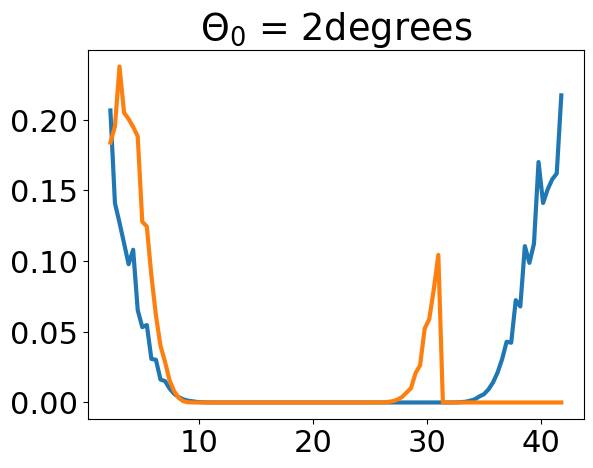

In [7]:
from scipy import interpolate

sigma_stim = 32
sigma_rep = 128


theta0 = 2*np.pi/90.0 #30.124*np.pi/180.0
theta1 = 173*np.pi/90.0 #23.8*np.pi/180.0
type = "prior"
interpolation_kind = "linear"

# sigma_stim = high_stim_noise
# sigma_rep =  low_rep_noise
bins = 100
risk_prob = 0.75


safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep , type, interpolation_kind, bins)
risky_value, risky_prob = model.risky_value_dist(theta1, sigma_stim, sigma_rep , risk_prob, type , interpolation_kind, bins)

plt.plot(safe_value,safe_prob[0,:])
plt.plot(safe_value,risky_prob[0,:])

plt.title("$\Theta_0$ = " + str(round(theta0*90/np.pi))+ "degrees")

In [12]:
# How often is probability distribution 1 (risky) greater than distribution 2 (safe).

p = model.diff_dist(safe_value, risky_prob, safe_prob)#, model.diff_dist(safe_value, dens_risky, dens_safe[np.newaxis, :])
# model.get_rnp(safe_value, safe_value, p, risky_prob)

p
# plt.plot(integrate.cumtrapz(risky_prob[0,:] - safe_prob[0,:], risky_value, initial=0.0))


/Users/sbedi/git/Information-and-Value/encoding_decoding/riskModelPercept.py:287: RuntimeWarning: divide by zero encountered in divide
  result = minimize(cost_, (-safe_payoff/risk_prob, 1.0), method='L-BFGS-B')


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

# Uncovering risk attitudes

# Exaggerated risks by taking opposing noise regimes

In [13]:

def find_rnp_diffNoises(safeNoise, riskyNoise, type, risk_prob, experimentEffects):

    # Getting all the values from actual transformation
    interval = 13
    end = int(experimentEffects[-2:])
    start = int(experimentEffects[0:2])
    if (((type=="prior" or type=="linearPrior" or type=="curvedPrior") and (experimentEffects=="45to90")) or
        ((type=="inversePrior" or type=="inverseLinearPrior" or type=="inverseCurvedPrior") and (experimentEffects == "00to45"))):
            safe_angles =  np.linspace(start/90., (end-interval)/90., int(interval+1))*np.pi
    elif (((type=="prior" or type=="linearPrior" or type=="curvedPrior") and (experimentEffects=="00to45")) or
        ((type=="inversePrior" or type=="inverseLinearPrior" or type=="inverseCurvedPrior") and (experimentEffects=="45to90"))):
            safe_angles =  np.linspace(end/90., (start+interval)/90., int(interval+1))*np.pi
    rnp = np.zeros(len(safe_angles))
    safeVals = np.zeros(len(safe_angles))

    for i in range(len(safe_angles)):
        if (((type=="prior" or type=="linearPrior" or type=="curvedPrior") and (experimentEffects=="45to90")) or
            ((type=="inversePrior" or type=="inverseLinearPrior" or type=="inverseCurvedPrior") and (experimentEffects == "00to45"))):
                rangeOri = np.linspace(safe_angles[i],  safe_angles[i]+(interval/90.*np.pi), interval)
        elif (((type=="prior" or type=="linearPrior" or type=="curvedPrior") and (experimentEffects=="00to45")) or
            ((type=="inversePrior" or type=="inverseLinearPrior" or type=="inverseCurvedPrior") and (experimentEffects=="45to90"))):
                rangeOri = np.linspace(safe_angles[i],  safe_angles[i]-(interval/90.*np.pi), interval)


        safeVal = model.value_function_ori(safe_angles[i], type)
        safeVals[i] = safeVal
        val_range = model.value_function_ori(rangeOri, type)
        riskyVal_range = risk_prob*model.value_function_ori(rangeOri, type)

        # getting inferred safe values
        safe_value, safe_prob = model.safe_value_dist(safe_angles[i], safeNoise[0], safeNoise[1], type, interpolation_kind = "linear", bins=100)
        safe_value, risky_prob = model.risky_value_dist((rangeOri), riskyNoise[0], riskyNoise[1], risk_prob, type, interpolation_kind = "linear",  bins=100)

        # Risk attitudes 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)

        safeVals[i] = safeVal
        rnp[i] = model.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)
    return safe_angles, safeVals, rnp




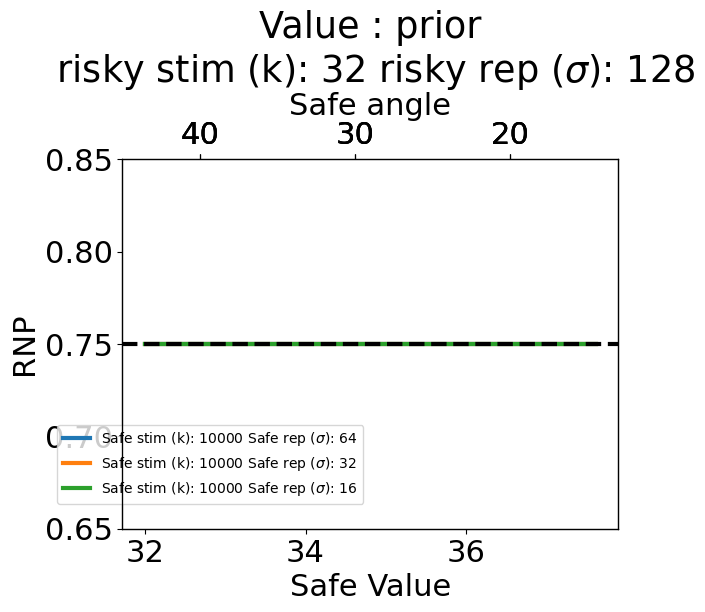

In [15]:

# setting parameters
experimentEffects = "00to45"
risk_prob = 0.75
type = "prior" 

# changeable parameters
high_stim_list = [32]
low_stim_list = [10000]
high_rep_list = [64,32, 16]
low_rep_list = [128]

fig = plt.figure()
ax1 = fig.add_subplot(111)

for high_stim_noise in high_stim_list:
    for high_rep_noise in high_rep_list:
        for low_stim_noise in low_stim_list:
            for low_rep_noise in low_rep_list:

                safeNoise = [low_stim_noise, high_rep_noise]
                riskyNoise = [high_stim_noise, low_rep_noise]

                safe_angles, safeVals, rnp = find_rnp_diffNoises(safeNoise, riskyNoise, type, risk_prob, experimentEffects)

                ax1.set_ylim(0.65, 0.85)

                text = "Safe stim (k): "+ str(safeNoise[0])+" Safe rep ($\sigma$): "+str(safeNoise[1])
                # text = "Risky stim (k): "+ str(riskyNoise[0])+"; Risky rep ($\sigma$): "+str(riskyNoise[1])
                ax1.plot(safeVals[:], rnp[:], label = text)

                ax2 = ax1.twiny()
                if (((type=="prior" or type=="linearPrior" or type=="curvedPrior") and (experimentEffects=="00to45")) or
                    ((type=="inversePrior" or type=="inverseLinearPrior" or type=="inverseCurvedPrior") and (experimentEffects=="45to90"))):
                        ax2.set_xlim(max(safe_angles*90./np.pi), min(safe_angles*90./np.pi))

                ax2.plot(safe_angles*90./np.pi, np.ones(len(safe_angles))/1.3, alpha=0.0)


ax1.axhline(risk_prob, c='k', ls='--')

ax1.legend(bbox_to_anchor=(0.5, 0.3), prop={'size': 10})
ax2.set_xlabel("Safe angle")
ax1.set_xlabel("Safe Value")
ax1.set_ylabel("RNP")
# if len(safeNoise[0])==1 and len(safeNoise[1])==1:
# ax1.set_title("Value : " + type + "\n safe stim (k): "+str(safeNoise[0])+"; safe rep ($\sigma$): "+str(safeNoise[1]))
# else:
ax1.set_title("Value : " + type + "\n risky stim (k): "+str(riskyNoise[0])+" risky rep ($\sigma$): "+str(riskyNoise[1]))
plt.savefig('/Users/sbedi/Downloads/testfig1.png',dpi=300, bbox_inches = "tight")

# Comaparing two models - Both safe and risky option with same noise type

In [35]:
inverse_monotonic(model.value_function_ori(1./90.*np.pi, type = "prior")/1.5)*90./np.pi

72.36

In [10]:
def find_rnp(stim_noise, rep_noise, type, risk_prob, experimentEffects):

    # Getting all the values from actual transformation
    end = int(experimentEffects[-2:])
    start = int(experimentEffects[0:2])
    interval = 13

    if (type=="prior" or type=="linearPrior" or type=="curvedPrior"):
        start_safe = inverse_monotonic(model.value_function_ori(start/90.*np.pi, type)/1.5)
        safe_angles =  np.linspace(end/90., (start+interval)/90., int(interval+1))*np.pi

    rnp = np.zeros(len(safe_angles))
    safeVals = np.zeros(len(safe_angles))

    for i in range(len(safe_angles)):
        safeVal = model.value_function_ori(safe_angles[i], type)
        safeVals[i] = safeVal
        val_range = model.value_function_ori(rangeOri, type)
        riskyVal_range = risk_prob*model.value_function_ori(rangeOri, type)

        # getting inferred safe values
        safe_value, safe_prob = model.safe_value_dist(safe_angles[i], stim_noise, rep_noise , type, bins=100)
        rr, risky_prob = model.risky_value_dist((rangeOri), stim_noise, rep_noise, risk_prob, type, bins=100)

        # Risk attitudes 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
        rnp[i] = model.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)
    return safe_angles, safeVals, rnp




UnboundLocalError: local variable 'safe_angles' referenced before assignment

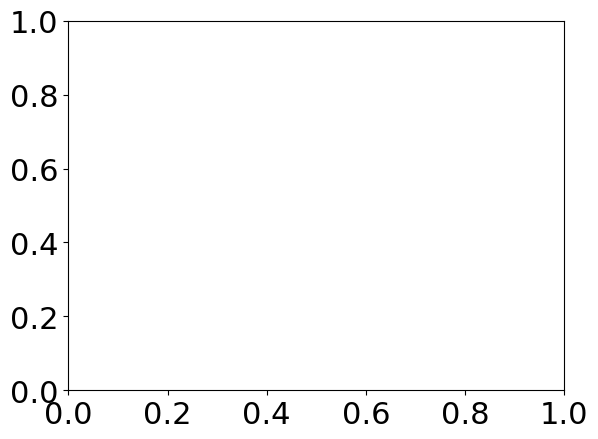

In [11]:
# setting parameters
experimentEffects = "00to180"
risk_prob = 0.75
type = "prior" 

# changeable parameters
stim_list = [10000]
rep_list = [256, 128, 64, 32, 16]

fig = plt.figure()
ax1 = fig.add_subplot(111)

for stim_noise in stim_list:
    for rep_noise in rep_list:

        safe_angles, safeVals, rnp = find_rnp(stim_noise, rep_noise, type, risk_prob, experimentEffects)
        # ax1.set_ylim(risk_prob - 0.05, risk_prob+0.05)
        # ax1.set_ylim(0.70, 0.8)

        text = "stim (k): "+ str(stim_noise)+"; rep (k): "+str(rep_noise)
        ax1.plot(safeVals[:], rnp[:], label = text)

        ax2 = ax1.twiny()
        if (((type=="prior" or type=="linearPrior" or type=="curvedPrior") and (experimentEffects=="00to45")) or
            ((type=="inversePrior" or type=="inverseLinearPrior" or type=="inverseCurvedPrior") and (experimentEffects=="45to90"))):
                ax2.set_xlim(max(safe_angles*90./np.pi), min(safe_angles*90./np.pi))
    
        ax2.plot(safe_angles*90./np.pi, np.ones(len(safe_angles))/1.3, alpha=0.0)

ax1.axhline(risk_prob, c='k', ls='--')
ax1.legend(bbox_to_anchor=(0.6, 0.6), prop={'size': 10})
ax2.set_xlabel("Safe angle")
ax1.set_xlabel("Safe Value")
ax1.set_ylabel("RNP")
ax1.set_title("Value : " + type) 


plt.savefig('/Users/sbedi/Downloads/testfig1.png',dpi=300, bbox_inches = "tight")

# risk of an option

# different noise regimes


In [ ]:
# Prior
# Noise regimes

# In the linear mapping condition, if safe option is displayed with high sensory noise it results in safe option being percieved 
# with low val and if risky is with hig stim noise, it is percieved with higher value - risk seekinfg behavior



# changeable parameters
high_stim_noise = 32
low_stim_noise = 1000
high_rep_noise = 32
low_rep_noise = 128

risk_prob = 0.75
type = "linearPrior"   

# Getting all the values from actual transformation
rangeOri = np.linspace(39/90., 22/90., 100)*np.pi
val_range = model.value_function_ori(rangeOri, type)
safeVal = val_range[0]
riskyVal_range = risk_prob*model.value_function_ori(rangeOri, type)

# getting inferred safe values
safe_value, safe_prob = model.safe_value_dist(rangeOri[0], high_stim_noise, low_rep_noise , type, interpolation_kind = "linear", bins=25)

risky_value, risky_prob = model.risky_value_dist((rangeOri), low_stim_noise, high_rep_noise, risk_prob, type, interpolation_kind = "linear",  bins=25)

# Risk attitudes 
p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)

# The value of the safe option
plt.axvline(safeVal, c='r', label = "safe option\n value")
# Where the risky option value is the same as the safe option value,
# the probability of chosing should have been 0.5 i there were no biases at all.
plt.axhline(0.5, c='k', ls='--')
plt.ylim(0.4,0.6)

# Plotting the risky option value throughout the range and comparing where it crosses the 0.5 probability mark
# and whether it is equal to the actual rational equilibrium that would have been without biases.
plt.plot(riskyVal_range, np.squeeze(p_chose_risky))#, label=['rep',kappa_r, "stim (deg)",round(kappa_s*180,2)])


# plt.legend(loc = 'lower right')

plt.xlabel("Expected value for risky option")
plt.ylabel("P (choosing risky option)")
plt.title("Value mapping -\n" + type) 

plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

model.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)

single option risk

In [10]:
def inverse_monotonic(y_0, x = model.stim_grid, y = model.value_function_ori(model.stim_grid, type="prior")):
    indices = np.argsort(y)
    y_sorted = y[indices]
    
    def find_closest_index(y_0):
        i = np.searchsorted(y_sorted, y_0, side='left')
        if i == 0:
            return 0
        elif i == len(y_sorted):
            return len(y_sorted) - 1
        else:
            if y_0 - y_sorted[i-1] < y_sorted[i] - y_0:
                return i - 1
            else:
                return i

    i = find_closest_index(y_0)
    x_inverse = x[indices[i]]*90./np.pi
    
    return x_inverse


In [29]:
# inverse_monotonic(28)*90./np.pi
model.value_function_ori(178/90.*np.pi, "prior")

array(2.69756474)

indifference: 48.54409462039004
safeVal: 36.40807096529253
valrange: [36.40807097 36.44026724 36.47254716 36.50491022 36.53735594 36.56988384
 36.60249342 36.6351842  36.66795567 36.70080736 36.73373876 36.76674938
 36.79983872 36.83300629 36.86625158 36.8995741  36.93297335 36.96644881
 37.         37.0336264  37.06732751 37.10110282 37.13495182 37.16887401
 37.20286887 37.23693589 37.27107456 37.30528437 37.3395648  37.37391534
 37.40833547 37.44282466 37.47738241 37.5120082  37.54670149 37.58146178
 37.61628853 37.65118123 37.68613934 37.72116235 37.75624972 37.79140093
 37.82661546 37.86189275 37.8972323  37.93263357 37.96809602 38.00361912
 38.03920234 38.07484514 38.11054698 38.14630734 38.18212566 38.21800142
 38.25393407 38.28992306 38.32596787 38.36206795 38.39822275 38.43443173
 38.47069435 38.50701006 38.54337832 38.57979857 38.61627027 38.65279287
 38.68936582 38.72598858 38.76266058 38.79938128 38.83615013 38.87296657
 38.90983006 38.94674002 38.98369592 39.02069719 39.057

0.75

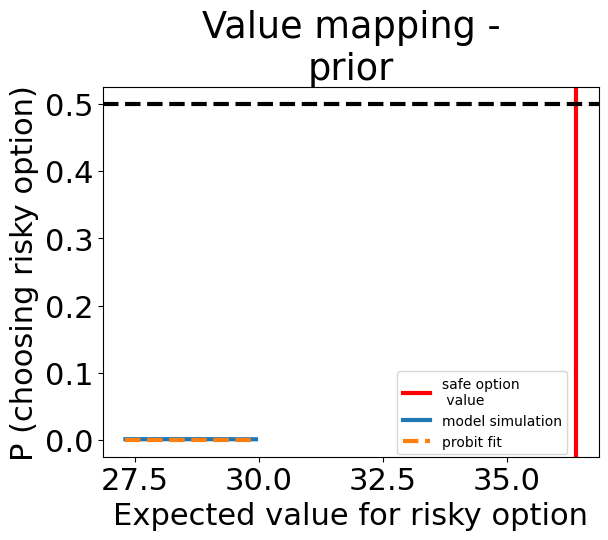

In [31]:

# changeable parameters
stim_noise = 1000
rep_noise = 32

risk_prob = 0.75
type = "prior" 
start = 175

# Getting all the values from actual transformation
interval = inverse_monotonic(model.value_function_ori(start/90.*np.pi,type)*1.5) - inverse_monotonic(model.value_function_ori(start/90.*np.pi,type))
rangeOri = np.linspace(start/90., (start-interval)/90., 100)*np.pi
val_range = model.value_function_ori(rangeOri, type)
safeVal = val_range[0]
riskyVal_range = risk_prob*model.value_function_ori(rangeOri, type)

# getting inferred safe values
safe_value, safe_prob = model.safe_value_dist(rangeOri[0], stim_noise, rep_noise , type, interpolation_kind = "linear", bins=25)

risky_value, risky_prob = model.risky_value_dist((rangeOri), stim_noise, rep_noise, risk_prob, type, interpolation_kind = "linear",  bins=25)

# Risk attitudes 
p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)

# The value of the safe option
plt.axvline(safeVal, c='r', label = "safe option\n value")
# Where the risky option value is the same as the safe option value,
# the probability of chosing should have been 0.5 i there were no biases at all.
plt.axhline(0.5, c='k', ls='--')
# plt.ylim(0.4,0.6)

# Plotting the risky option value throughout the range and comparing where it crosses the 0.5 probability mark
# and whether it is equal to the actual rational equilibrium that would have been without biases.
plt.plot(riskyVal_range, np.squeeze(p_chose_risky), label = "model simulation")#, label=['rep',kappa_r, "stim (deg)",round(kappa_s*180,2)])

from scipy.optimize import minimize

y = p_chose_risky.ravel()
x = val_range.ravel()


def get_probit(x, intercept, slope):
    return ss.norm(0.0, 1.0).cdf(intercept + slope*x)

def cost(xs, ps, intercept, slope):
    return np.sum((get_probit(xs, intercept, slope) - ps)**2)

def cost_(pars, *args):
    intercept, slope = pars
    return cost(x, y, intercept, slope)

result = minimize(cost_, (-safeVal/risk_prob, 1.0), method='L-BFGS-B')

intercept_est, slope_est = result.x

indifference_point = -intercept_est/slope_est

rnp = safeVal / indifference_point

plt.plot(riskyVal_range, get_probit(x, intercept_est, slope_est), "--", label = "probit fit")

plt.legend(bbox_to_anchor=(0.95, 0.25), prop={'size': 10})

plt.xlabel("Expected value for risky option")
plt.ylabel("P (choosing risky option)")
plt.title("Value mapping -\n" + type) 

plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

print("indifference:", indifference_point)
print("safeVal:", safeVal)
print("valrange:", val_range)
model.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)

In [15]:
inverse_monotonic()

5.881061447520093

Text(0, 0.5, 'Mean bias')

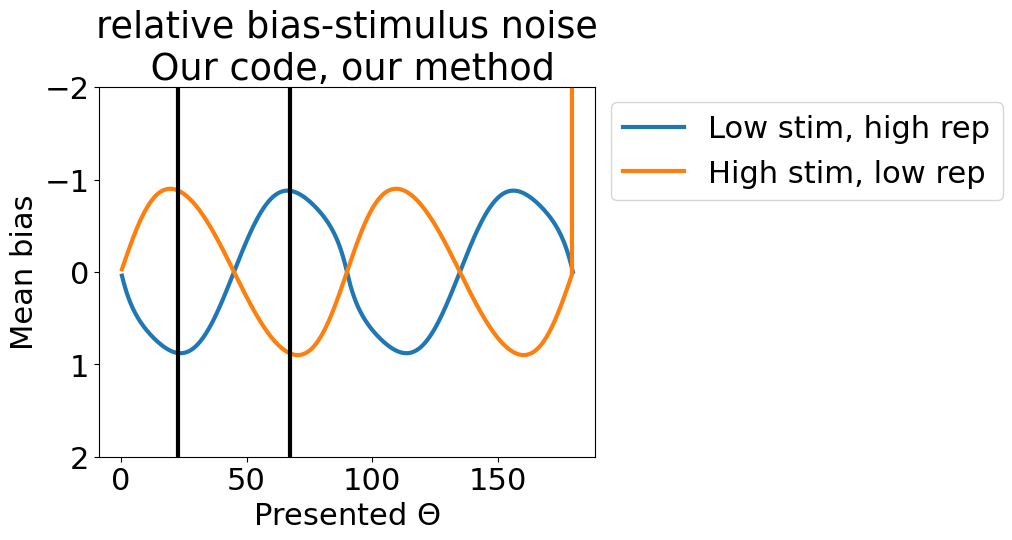

In [80]:
theta0 = model.stim_grid #0.8
# theta0 = theta0[:-1]
kappa1 =10000
kappa2 = 16

# E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappa1, kappa, normalize = False)
# plt.plot(theta0*90./np.pi, (E_theta_given_theta0 - theta0)*90./np.pi, label = "Low stim")

# E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappas1, kappar1, normalize = False)
# plt.plot(theta0[1:]*90./np.pi, (E_theta_given_theta0 - theta0)[1:]*90./np.pi, label = "Low stim, low rep")


E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappa1, kappa2, normalize = False)
plt.plot(theta0[1:]*90./np.pi, (E_theta_given_theta0 - theta0)[1:]*90./np.pi, label = "Low stim, high rep")



E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappa2, kappa1, normalize = False)
plt.plot(theta0[1:]*90./np.pi, (E_theta_given_theta0 - theta0)[1:]*90./np.pi, label = "High stim, low rep")




plt.ylim(2.0,-2.0)

plt.axvline(22.5, c='k')
plt.axvline(67.5, c='k')
# plt.axvline(112.5, c='k')
# plt.axvline(157.5, c='k')


plt.legend(bbox_to_anchor=(1., 1.0))

plt.title('relative bias-stimulus noise\n Our code, our method')
plt.xlabel("Presented $\Theta$")
plt.ylabel("Mean bias")
# plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")